# Сервис аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:


    - без подписки
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
    - с подпиской Ultra
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно.
        
        
Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

    -Пользователи — users_go.csv
        user_id - уникальный идентификатор пользователя
        name - имя пользователя
        age - возраст
        city - город
        subscription_type - тип подписки (free, ultra)

    -Поездки — rides_go.csv
        user_id - уникальный идентификатор пользователя
        distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
        duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
        date - дата совершения поездки

    -Подписки — subscriptions_go.csv
        subscription_type - тип подписки
        minute_price - стоимость одной минуты поездки по данной подписке
        start_ride_price - стоимость начала поездки
        subscription_fee - стоимость ежемесячного платежа
        
Наш __план__ - это изучить файлы с данными о пользователях,их поездках и подписке, предобработать их, провести исследовательский анализ, затем проверить ряд гипотез.(подробные таски описаны ниже по ходу проекта)


In [94]:
# импортируем биб-ки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Шаг 1. Загрузка данных

#### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('/Users/alex/Downloads/users_go.csv')
    data_rides = pd.read_csv('/Users/alex/Downloads/rides_go.csv')
    data_sub = pd.read_csv('/Users/alex/Downloads/subscriptions_go.csv')

#### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
# Для пользователей

data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_users['age'].describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [6]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

На первый взгляд все ок, нет пропусков, нет "странных" городов, отсутсвуют аномальные люди чей возрост был бы 9999 или 0.1 и тд)

In [7]:
# Поездки 

data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [10]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Вроде все ок, но есть странные/маленькие/аномальные значения - как в преодаленной дистанции так и во времени эксплуатации.

In [11]:
# Подписки

data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:

data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Шаг 2. Предобработка данных

#### Приведите столбец date к типу даты pandas.

In [13]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [14]:
# Изменим тип данных
data_rides['date'] = pd.to_datetime(data_rides['date'])

In [15]:
# Все гуд, едем дальше.
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создайте новый столбец с номером месяца на основе столбца date.

In [16]:
# Создадим новый столбец "month"

data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month

In [17]:
# все ок

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [92]:
# взглянем за какой период у нас данные - (2021)
pd.DatetimeIndex(data_rides['date']).year.value_counts()

date
2021    18068
Name: count, dtype: int64


#### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

##### data_users

In [19]:
# Проверим пропуски.
data_users.isna().sum()

# пропусков нет

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [20]:
# Дубликаты

data_users.duplicated().sum()

31

In [21]:
# глянем длину дф ДО
len(data_users)

1565

In [22]:
# Удалим их
data_users.drop_duplicates(inplace = True)
data_users.duplicated().sum()

0

In [23]:
# Восстановим индексы и глянем длину ПОСЛЕ удаления
data_users.reset_index(drop = True , inplace = True)
len(data_users)

1534

##### data_rides

In [24]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [25]:
data_rides.duplicated().sum()

# Все ок, перейдем к подпискам

0

##### data_sub

In [26]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [27]:
data_sub.duplicated().sum()

0

Полностью согласен, видимо я не заметил, что не добавил промежуточный вывод.

На данном этапе мы проверили 3 датафрейма на наличие пропусков - пропуски не обнаружены, далее проверили на дубликаты и выявили явные дубликаты, в кол-ве 31 в данных о пользователях, удалили их, длина датафрейма стала меньше ровно на это кол-во, затем перезаписали индексы.

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов.

In [30]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

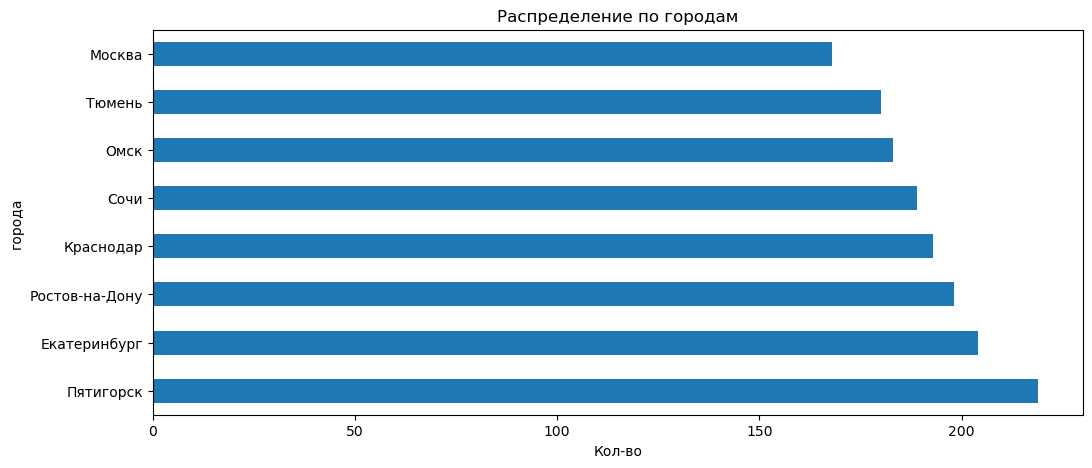

In [90]:
plt.figure(figsize=(12,5))
data_users['city'].value_counts().plot(kind = 'barh',
                                       title = 'Распределение по городам',
                                       xlabel = 'Кол-во',ylabel = 'города')
plt.show()

#### Соотношение пользователей с подпиской и без подписки.


In [32]:
data_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

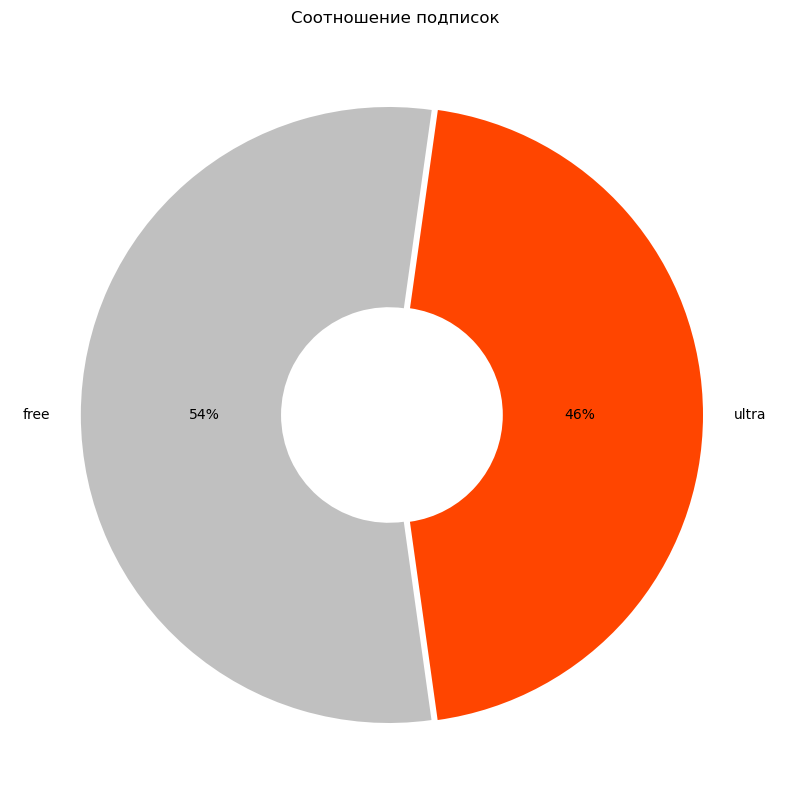

In [91]:
# Пирог распределения подписок =)

data_users['subscription_type'].value_counts().plot(
    kind = 'pie',
    title = 'Соотношение подписок',
    autopct = '%1.0f%%',
    wedgeprops = dict(width = 0.65),
    startangle = 82,
    explode = (0.02, 0),
    colors = ['silver', 'orangered'],
    figsize = (10, 10))

plt.axis('off')
plt.show()

#### Возраст пользователей.

In [34]:
# распределение возроста
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

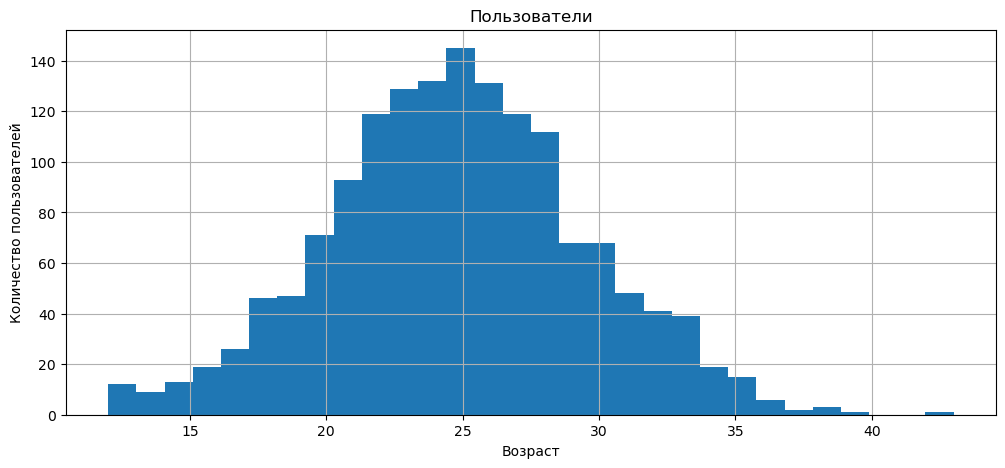

Самый юнный пользователь: 12 лет
Самый возростной пользователь: 43 года
Средний возрост пользователя: 25 лет


In [35]:
# Построим график распределения по возросту.

plt.figure(figsize = (12, 5))
plt.hist(data_users['age'], bins = 30)
plt.grid()
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Пользователи')
plt.show()
print(f"Самый юнный пользователь: {data_users['age'].min()} лет")
print(f"Самый возростной пользователь: {data_users['age'].max()} года")
print(f"Средний возрост пользователя: {int(data_users['age'].median())} лет")

#### Расстояние, которое пользователь преодолел за одну поездку.

In [36]:
data_rides.query('distance < 10')

,user_id,distance,duration,date,month
7841,796,7.097072,10.026614,2021-11-26,11
8658,861,6.784447,6.015656,2021-07-21,7
9541,925,2.570787,3.011018,2021-10-19,10
11555,1069,0.855683,10.001902,2021-01-31,1
13690,1223,4.329506,4.008958,2021-05-22,5


Как раз то самое, аномальное значение у пользователя чей id 1069

In [37]:
# глянем на него поближе)
data_rides.query('user_id == 1069')

,user_id,distance,duration,date,month
11554,1069,2950.223566,14.375559,2021-01-07,1
11555,1069,0.855683,10.001902,2021-01-31,1
11556,1069,4055.997694,26.382847,2021-01-31,1
11557,1069,3527.772916,24.242398,2021-02-07,2
11558,1069,2016.747075,21.083735,2021-03-18,3
11559,1069,5780.316092,0.500000,2021-04-06,4
11560,1069,4689.915558,13.822882,2021-04-07,4
11561,1069,3985.184651,9.970369,2021-04-25,4
11562,1069,4473.933672,23.174001,2021-05-07,5
11563,1069,3308.001455,29.267699,2021-05-12,5


Вполне таки активный пользователь, и не понятно, что делать с этой аномалией - ведь это может быть как поломка самоката или просто сел аккум у самоката, и пользователь пытался завершить аренду, но что-то шло не так.... или же просто человек снял его "как обычно они стоят у всяких тц/магазинов и тд" и пошел за покупками, а после решил поехать на такси или пойти пешком))

Принимаю решение оставить эту аномалию)

P.s. мой уважаемый ревьюер, если я не прав, подправим, ведь это может быть и технич сбой и данные как то некорректно добавились в таблицу=))

In [38]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

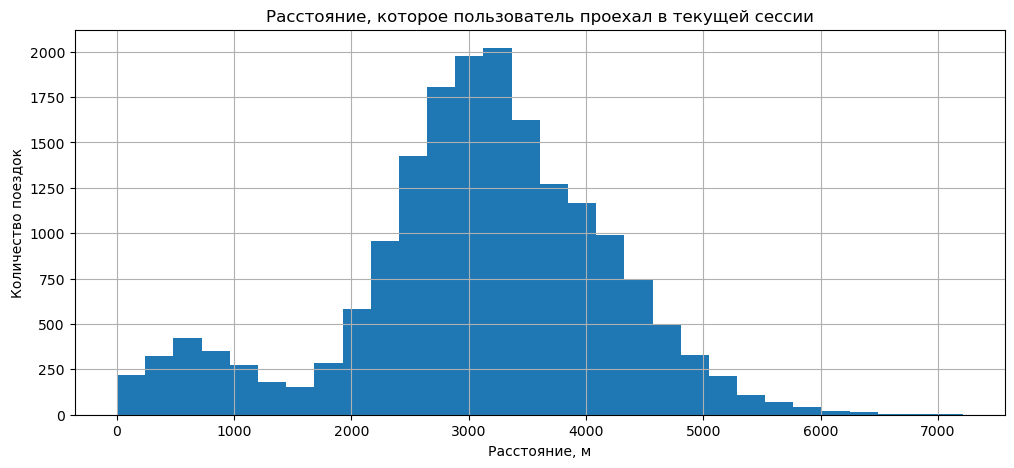

Минимальное расстояние: 0.86 
Максимальное расстояние: 7211.01 
Среднее(медианное) расстояние: 3133.61


In [39]:
# Построим график по дистанции

plt.figure(figsize = (12, 5))
plt.hist(data_rides['distance'], bins = 30)
plt.grid()
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь проехал в текущей сессии')
plt.show()
print(f'Минимальное расстояние: {round(data_rides["distance"].min(), 2)} \nМаксимальное расстояние: {round(data_rides["distance"].max(), 2)} \nСреднее(медианное) расстояние: {round(data_rides["distance"].median(), 2)}')


In [40]:
data_rides.query('distance < 1000')

,user_id,distance,duration,date,month
2,1,754.159807,6.232113,2021-04-20,4
9,1,748.690645,15.041884,2021-11-22,11
20,2,923.007439,6.914760,2021-08-03,8
47,4,724.559572,11.811399,2021-11-14,11
91,9,979.657684,17.521497,2021-03-08,3
...,...,...,...,...,...
18030,1532,842.097458,8.608989,2021-04-01,4
18031,1532,303.787850,7.792490,2021-05-21,5
18037,1532,662.468186,9.528773,2021-11-18,11
18043,1533,310.488247,10.642389,2021-02-21,2


Заметно 2 пиковых значения, вероятно связано с тем, что люди порой берут в аренду самокат, просто чтобы условно доехать до метро, ближайшего магазина, или наоборот от метро до дома и тд, да и много вариантов можно предположить))

#### Продолжительность поездок.

Как мы заметили ранее, со временем тоже были аномальные значения

In [41]:
data_rides.query('distance > 4000')

# просто изучаю время-расстояние

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
4,1,4028.687306,26.265803,2021-08-28,8
10,1,4031.020195,17.674448,2021-12-14,12
14,2,4029.116927,25.109188,2021-03-23,3
32,3,5335.212090,25.848038,2021-07-14,7
...,...,...,...,...,...
18034,1532,4602.642357,32.013212,2021-08-21,8
18040,1532,4551.698449,31.007839,2021-12-21,12
18053,1533,4581.943632,21.163887,2021-08-27,8
18055,1534,4678.415899,15.228198,2021-01-20,1


In [42]:
data_rides.query('distance > 6500')

# просто изучаю время-расстояние

,user_id,distance,duration,date,month
10341,981,6671.969833,27.297078,2021-12-06,12
10915,1022,6535.386520,30.008799,2021-10-14,10
11319,1052,6503.600402,26.008309,2021-07-01,7
11385,1057,6601.197575,0.500000,2021-02-07,2
12086,1108,6538.937375,29.649276,2021-09-27,9
15580,1361,6908.491343,23.816983,2021-03-27,3
16309,1411,7211.007745,0.500000,2021-04-15,4
16484,1422,7066.003772,23.619318,2021-02-12,2
17171,1471,6760.940067,32.043760,2021-08-03,8
17242,1477,6724.932981,0.500000,2021-01-12,1


In [43]:
data_rides.query('duration < 1')

# Целых 95 строк со значнием меньше минуты, при этом дистанции большие. Это явно какой то сбой.

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


На глаз уже заметно, что есть значения дистанции, как около 4000 метров, так и почти 7000 метров.

Нужно исправлять этих гонщиков)Погуглив, выяснил, что средняя скорость самокатов около __20 км/ч__, поэтому умножим наше сломанное время на __50.__ -  мы получим правдивую картину,для расстояния около 4000 метров будет похожие 25 мин, как и для дистанции близкой к 7000 будет тоже допустимые 25 мин. 

Т.к. если мы умножим на меньшее число, мы получим на выходе очень быстрые самокаты, а у нас они все же арендные, а не гоночно-чипованные))

In [44]:
broken_riders = data_rides.query('duration < 1').index
data_rides.loc[broken_riders, 'duration'] = data_rides.loc[broken_riders, 'duration'] * 50

In [45]:
data_rides['duration'].describe()

# Вроде картина стала получше) едем дальше.

count    18068.000000
mean        17.933830
std          5.981796
min          2.035632
25%         13.697117
50%         17.750643
75%         21.824361
max         40.823963
Name: duration, dtype: float64

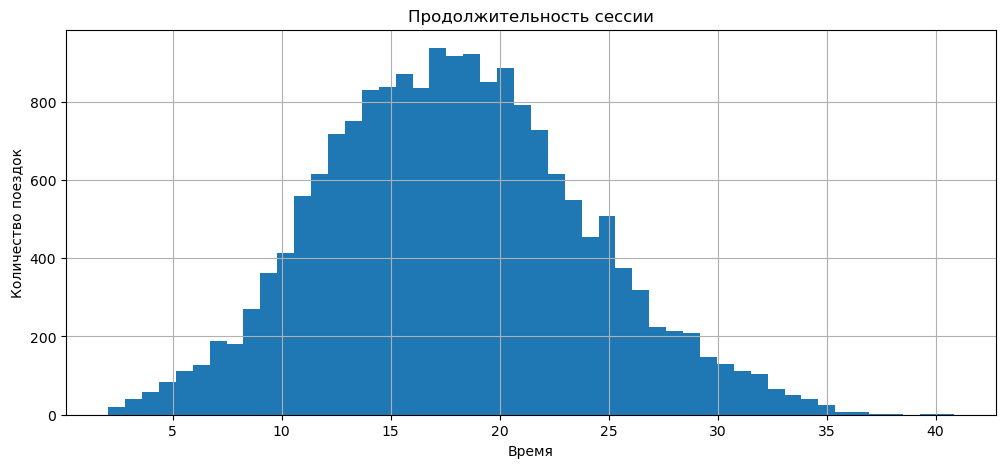

Минимальное время аренды: 2 мин.
Максимальное время аренды: 41 мин.
Среднее(медианное) время аренды : 18 мин.


In [46]:
# Построим график по времени аренды

plt.figure(figsize = (12, 5))
plt.hist(data_rides['duration'], bins = 50)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.title('Продолжительность сессии')
plt.show()
print(f"Минимальное время аренды: {round(data_rides['duration'].min())} мин.")
print(f"Максимальное время аренды: {round(data_rides['duration'].max())} мин.")
print(f"Среднее(медианное) время аренды : {round(data_rides['duration'].median())} мин.")

__ВЫВОД__    
    
    
    Изучив данные можно сделать следующие промежуточные выводы :
         
- Расспределение по частоте аренды самокатов в городах - приблезительно одинаковое. Лидер среди городов - Пятигорск в нем арендовали самокат 219 раз, закрывает этот список - Москва, арендовали 168 раз.
- Доля пользователей без подписки немного больше чем с подпиской. Соотношение 54% / 46%
- Люди чей возраст от 20 до 30 лет - самые часто встречаемые пользователи. Также встречаются совсем юнные пользователи чей возраст ~ 13 лет, а так же встречаются более взрослые люди, чей возрост ~ 42 года.
- Среднее расстояние поездки состовляет около 3000 метров, хотя и езда на короткие дистанции тоже пользуется популярностью.
- Среднее время эксплуатации самоката составляет ~ 17 - 18 минут.

### Шаг 4. Объединение данных

#### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [47]:
len(data_users)

1534

In [48]:
# создадим объедененный дф data

data = data_users.merge(data_rides, left_on = 'user_id', right_on = 'user_id')
data = data.merge(data_sub, left_on = 'subscription_type', right_on = 'subscription_type')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [49]:
# проверим длину после объединения 
len(data)

18068

#### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    c данными о пользователях без подписки;

    с данными о пользователях с подпиской.

In [50]:
data_sub_free = data.query('subscription_type == "free"')
data_sub_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [51]:
data_sub_ultra = data.query('subscription_type == "ultra"')
data_sub_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


#### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

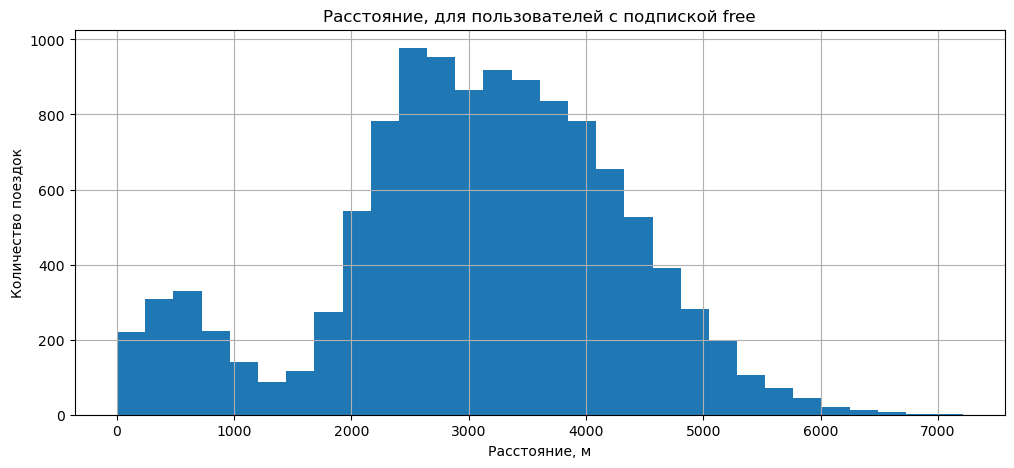

Минимальное расстояние: 0.86
Максимальное расстояние: 7211.01
Среднее(медианное) расстояние: 3114.65


In [52]:
# для free
# 1.расстояние

plt.figure(figsize = (12, 5))
plt.hist(data_sub_free['distance'], bins = 30)
plt.grid()
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Расстояние, для пользователей с подпиской free')
plt.show()
print(f'Минимальное расстояние: {round(data_sub_free["distance"].min(), 2)}') 
print(f'Максимальное расстояние: {round(data_sub_free["distance"].max(), 2)}') 
print(f'Среднее(медианное) расстояние: {round(data_sub_free["distance"].median(), 2)}')


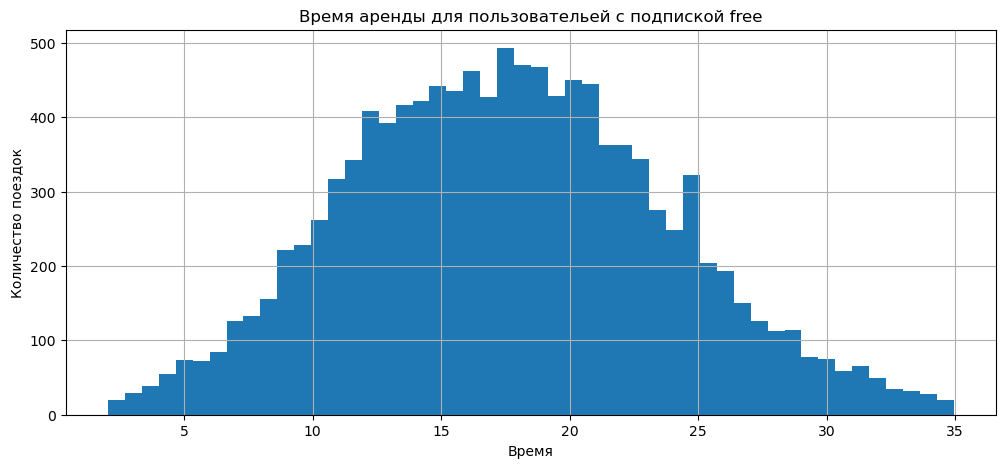

Минимальное время аренды: 2 мин.
Максимальное время аренды: 35 мин.
Среднее(медианное) время аренды : 17 мин.


In [53]:
# 2.время

plt.figure(figsize = (12, 5))
plt.hist(data_sub_free['duration'], bins = 50)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.title('Время аренды для пользовательей с подпиской free')
plt.show()
print(f"Минимальное время аренды: {round(data_sub_free['duration'].min())} мин.")
print(f"Максимальное время аренды: {round(data_sub_free['duration'].max())} мин.")
print(f"Среднее(медианное) время аренды : {round(data_sub_free['duration'].median())} мин.")

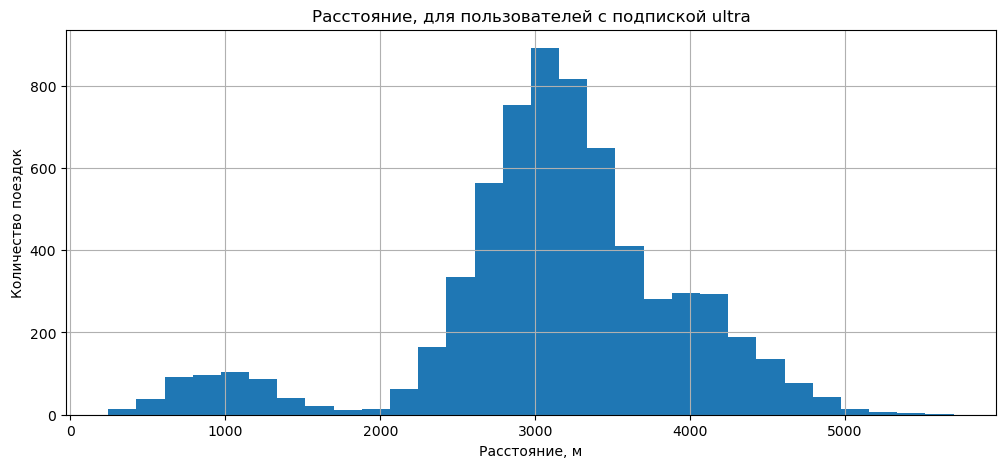

Минимальное расстояние: 244.21
Максимальное расстояние: 5699.77
Среднее(медианное) расстояние: 3148.64


In [54]:
# для ultra 
# 1.расстояние 

plt.figure(figsize = (12, 5))
plt.hist(data_sub_ultra['distance'], bins = 30)
plt.grid()
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Расстояние, для пользователей с подпиской ultra')
plt.show()
print(f'Минимальное расстояние: {round(data_sub_ultra["distance"].min(), 2)}') 
print(f'Максимальное расстояние: {round(data_sub_ultra["distance"].max(), 2)}') 
print(f'Среднее(медианное) расстояние: {round(data_sub_ultra["distance"].median(), 2)}')

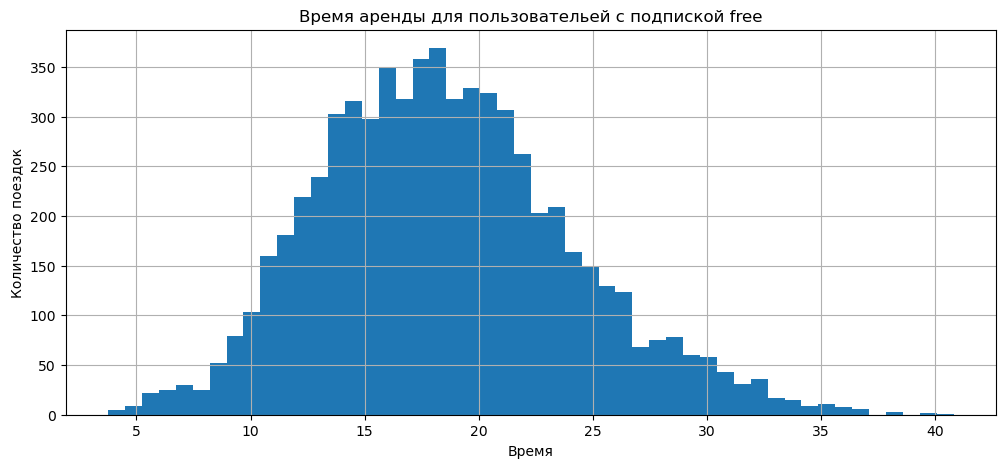

Минимальное время аренды: 4 мин.
Максимальное время аренды: 41 мин.
Среднее(медианное) время аренды : 18 мин.


In [55]:
# 2.время

plt.figure(figsize = (12, 5))
plt.hist(data_sub_ultra['duration'], bins = 50)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.title('Время аренды для пользовательей с подпиской free')
plt.show()
print(f"Минимальное время аренды: {round(data_sub_ultra['duration'].min())} мин.")
print(f"Максимальное время аренды: {round(data_sub_ultra['duration'].max())} мин.")
print(f"Среднее(медианное) время аренды : {round(data_sub_ultra['duration'].median())} мин.")

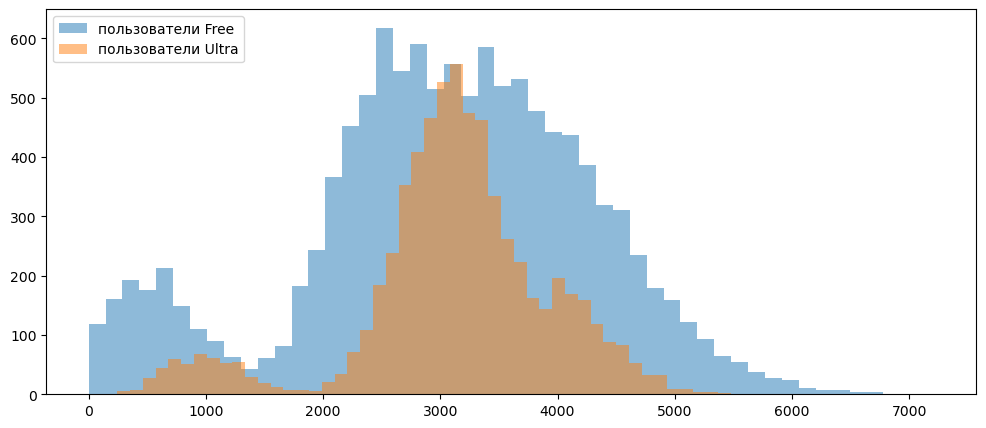

In [56]:
# для наглядности отобразим графики совместно 
# постоим для расстояния free - ultra

plt.figure(figsize = (12, 5))
plt.hist(data_sub_free['distance'], bins = 50, alpha = 0.5, label = 'пользователи Free')
plt.hist(data_sub_ultra['distance'], bins = 50, alpha = 0.5, label = 'пользователи Ultra')
plt.legend(loc = 'upper left')

plt.show()

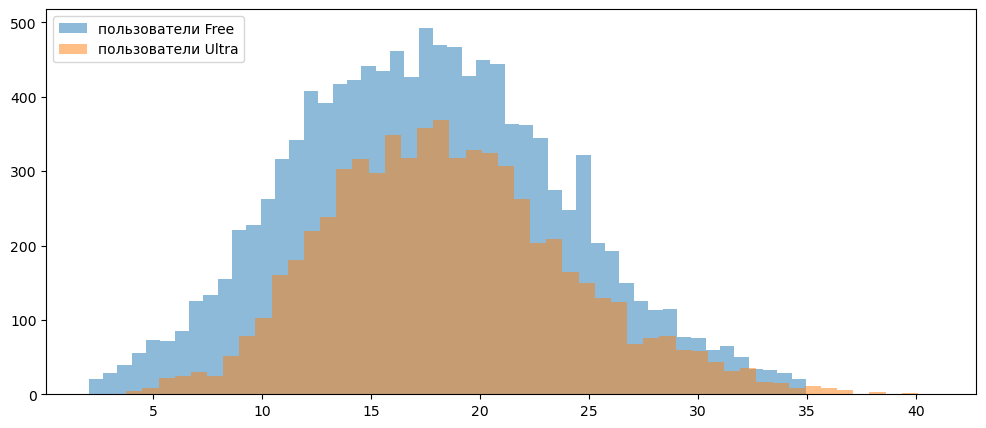

In [57]:
# постоим временные графики free - ultra

plt.figure(figsize = (12, 5))
plt.hist(data_sub_free['duration'], bins = 50, alpha = 0.5, label = 'пользователи Free')
plt.hist(data_sub_ultra['duration'], bins = 50, alpha = 0.5, label = 'пользователи Ultra')
plt.legend(loc = 'upper left')

plt.show()

Можно сделать сделать следующий промежуточный вывод:

    - пользователей с подпиской ultra меньше почти вдвое.
    - пользователи с подпиской и без, так же совешают поездки на малые,средние и дальние дистанции.
    - у пользователей с подпиской пиковые значения расстояния варьируются приблезительно от 2700 до 3500м , в то время как у пользователей без подписки приблезительно от 2000 до 4400м , скорее всего это влияние размера выборки.
    - что касается времени тут тоже +- похожая картина, плюс есть небольшой 'хвост' у пользователей с подпиской, скорее всего это исключение, нежели закономерность.
    
Едем дальше)

### Шаг 5. Подсчёт выручки

#### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [58]:
# до округления

data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [59]:
# После

data['duration'] = np.ceil(data['duration'])
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [95]:
# создадим сводную таблицу для кажного пользователя (user_id) за каждый месяц(month)

data_pivot_month_user = pd.pivot_table(data, index = ['month', 'user_id'],
                                      values = ['distance', 'date', 'duration', 'subscription_type'],
                                      aggfunc = {'distance': sum, 'date': len, 'duration': sum, 'subscription_type': min})

data_pivot_month_user.columns = ['count_rides', 'distance_sum', 'duration_sum', 'sub_type']
data_pivot_month_user['duration_sum'] = np.ceil(data_pivot_month_user['duration_sum'])
data_pivot_month_user['distance_sum'] = round(data_pivot_month_user['distance_sum'], 1)
data_pivot_month_user

count_rides  distance_sum  duration_sum sub_type
month user_id                                                  
1     1                  2        7027.5          42.0    ultra
      3                  1        3061.8          13.0    ultra
      5                  1        3914.6          13.0    ultra
      7                  2        6478.1          28.0    ultra
      12                 1        3577.2          33.0    ultra
...                    ...           ...           ...      ...
12    1525               1        4597.9          34.0     free
      1526               1        3644.1          23.0     free
      1528               1        3998.6          11.0     free
      1532               2        6111.9          42.0     free
      1534               1        2371.7          16.0     free

[11331 rows x 4 columns]

In [61]:
# проверил на всякий случай количество поездок в основной таблице и в сводной

data_pivot_month_user.query('user_id == 1')['count_rides'].sum() == data.query('user_id == 1')['date'].value_counts().sum()

# по 12 и там и там, все ок, едем дальше)

True

#### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 должны быть преобразованы к
26.

Помесячная выручка считается по формуле: (стоимость старта поездки × количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

In [62]:
# создадим фунцию для расчета выручки

def profit(row):
    if row['sub_type'] == 'free':
        return (50 * row['count_rides']) + (8 * row['duration_sum'])
    elif row['sub_type'] == 'ultra':
        return 6 * row['duration_sum'] + 199
    else:
        return '-9999'

In [63]:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [64]:
# применим нашу функцию

data_pivot_month_user['profit'] = data_pivot_month_user.apply(profit, axis = 1)
data_pivot_month_user

count_rides  distance_sum  duration_sum sub_type  profit
month user_id                                                          
1     1                  2        7027.5          42.0    ultra   451.0
      3                  1        3061.8          13.0    ultra   277.0
      5                  1        3914.6          13.0    ultra   277.0
      7                  2        6478.1          28.0    ultra   367.0
      12                 1        3577.2          33.0    ultra   397.0
...                    ...           ...           ...      ...     ...
12    1525               1        4597.9          34.0     free   322.0
      1526               1        3644.1          23.0     free   234.0
      1528               1        3998.6          11.0     free   138.0
      1532               2        6111.9          42.0     free   436.0
      1534               1        2371.7          16.0     free   178.0

[11331 rows x 5 columns]

In [65]:
# глянем, на пользователя user_id = 1

data_pivot_month_user.query('user_id == 1')

,,count_rides,distance_sum,duration_sum,sub_type,profit
month,user_id,,,,,
1,1,2,7027.5,42.0,ultra,451.0
4,1,1,754.2,7.0,ultra,241.0
8,1,2,6723.5,46.0,ultra,475.0
10,1,2,5809.9,32.0,ultra,391.0
11,1,3,7003.5,56.0,ultra,535.0
12,1,2,6751.6,28.0,ultra,367.0


In [66]:
# проверим нет ли -9999 =)

data_pivot_month_user.query('profit == -9999')

# супер, едем дальше

,,count_rides,distance_sum,duration_sum,sub_type,profit
month,user_id,,,,,


Подытожим: мы создали сводную таблицу для каждого пользователя по месяцам , посчитали суммарные время, дистанцию, кол-во поедок. Так же добавили новый столбец profit(выручка).



### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу, тратят ли больше времени на поездки пользователи с подпиской чем без неё.

 Пусть нулевая гипотеза(h0) будет звучать так:
 
    -время которое тратять пользователи с подпиской ultra равно времени пользователей без подписки.
    
 А альтернативная(h1) будет звучать так:
 
    -время пользователей с подпиской ultra больше времени пользователей без подписки.

In [96]:
# уровень статистической зависимости примем за 5%
alpha = 0.05

# передадим набор данных в переменные из уже созданнаго фрейма ultra и соответсвенно free
ultra = data_sub_ultra['duration']
free = data_sub_free['duration']


# проводим ttest для двух выборок
results = st.ttest_ind(ultra, free, alternative = 'greater')

print(f"Среднее значение продолжительности поездки для пользовалетей ultra: {round(data_sub_ultra['duration'].median(), 1)}")
print(f"Среднее значение продолжительности поездки для пользовалетей free: {round(data_sub_free['duration'].median(), 1)}")
print()
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение продолжительности поездки для пользовалетей ultra: 18.2
Среднее значение продолжительности поездки для пользовалетей free: 17.4

p-value: 5.424683099647868e-25
Отвергаем нулевую гипотезу


__Вывод__

__Отвергли гипотезу о том, что время ареды одинаковое у пользователей с подпиской и без__, вероятно, что пользователи с подпиской тратят больше арендного времени.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы..

Проверим гипотезу не привышают ли дистанцию в 3130 метров пользователи с подпиской ultra за одну поездку.

h0 : расстояние, которое проезжают пользователи подписки ультра за одну поездку __равна__ 3130 метров.

h1 : расстояние, которое проезжают пользователи подписки ультра за одну поездку __больше__ 3130 метров

In [68]:
# уровень статистической зависимости примем за 5%
alpha = 0.05

# передадим набор данных в переменную
ultra = data_sub_ultra['distance']

# предельная дистанция 
interested_value = 3130

# используем метод st.ttest_1samp
#results = st.ttest_1samp(ultra, interested_value, alternative = 'less')
results = st.ttest_1samp(ultra, interested_value, alternative = 'greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


__Вывод__

__Не удалось отвергнуть гипотезу о том, что пользователи проезжают за одну поездку статистически значимо не отличается от оптимального расстояния 3130 метров.__

#### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Гипотеза: месячная выручка(profit) больше от пользователей с подпиской ultra , чем от пользователей free

h0 : месячные выручки пользовательей ultra и free равны.

h1 : месячная выручка пользователей ultra выше чем у пользователей free

In [69]:
# уровень статистической зависимости примем за 5%
alpha = 0.05

# передадим набор данных в переменные из уже созданнаго фрейма ultra и соответсвенно free
ultra_profit = data_pivot_month_user.loc[data_pivot_month_user['sub_type'] == 'ultra', 'profit'] 
free_profit = data_pivot_month_user.loc[data_pivot_month_user['sub_type'] == 'free', 'profit']


# проводим ttest для двух выборок
results = st.ttest_ind(ultra_profit, free_profit, alternative = 'greater')

print(f"Среднее значение пользователей ultra: {data_pivot_month_user.loc[data_pivot_month_user['sub_type'] == 'ultra', 'profit'].median()}")
print(f"Среднее значение пользователей free: {data_pivot_month_user.loc[data_pivot_month_user['sub_type'] == 'free', 'profit'].median()}")
print()

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение пользователей ultra: 337.0
Среднее значение пользователей free: 274.0

p-value: 7.649833885338678e-27
Отвергаем нулевую гипотезу


__Вывод__

Проверили гипотезу , у нас есть основания говорить, что выручка от пользователей с подпиской ultra выше чем от пользователей free

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мы будем использовать гипотезу о равенстве средних для зависимых (парных) выборок
 
h0: m1 = m2

h1: m1 > m2

где, m1 и m2 - средние значения до и после изменения.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок применим метод st.ttest_rel()


# Общий вывод

В ходе проекта мы познакомились и изучили данные компании GoFast.

С самого начала нам было дано 3 файла(датафрейма) с данными о пользователях, информацией о поездках, и подписках. __На этапе предобработки данных__, выполнили слудующие действия: 

    -Привели столбец date к типу даты pandas;
    -Добавили новый столбец с номером месяца на основе столбца date;
    -Обработали дубликаты.
    
Далее в ходе __исследовательского анализа__ и мы выяснили:
    
    -Что количество пользователей распределено по городам приблезительно одинаково, нет явных фаворитов. Лидером является Пятигорск - 219 пользователей. Меньше всего в Москве - 168;
    -Пользователей без подписки - 835 человек, что составляет 54% от общего кол-ва пользователей, пользователей с подпиской ultra - 699 человек;
    -Средний возрост пользователей варьируется от 20 до 30 лет - они самые активные,так же втречаются, как и совсем юнные так и более взрослые пользователи;
    -Чаще всего поездки совершаются на расстояния от 2.5 до 3.5км, так же встречаются и любители коротких и совсем длинных покатушек;
    -Время на которое арендуется самокат в среднем от 15 до 20 минут. На этом этапе мы обнаружили аномалии,и подправили их)
   
Далее мы __объеделили данные 3х файлов__ в один датафрейм, после чего создали отдельные дфы для пользователей с подпиской и без, и визуализировали информацию о времени аренды, расстоянии для каждого из тарифов. Изучив графики можно сказать следующее:
    
    - пользователи free проезжаю от 2 до 5км в среднем , но бывают и те, кто умудряются проехать и по 7км, в то время, как у пользователей ultra в большей степени около 3км.
    - что касается времени, люди без подписки в среднем укладываюся от 10 до 25 минут, в то время , как люди с подпиской тратят в большинстве своем от 14 до 23 мнут.
    
Так же подсчитали выручку, сколько пользователи платят за поездки помесячно.

Проверили следующие гипотезы:

-Тратят ли больше времени на поездки пользователи с подпиской чем без неё:

    Отвергли нулевую гипотезу о том, что пользователи с подпиской и без тратят одинаковое время. Вероятнее всего можно сказать, что пользователи с подпиской проводят больше времени.
    
-Не привышают ли дистанцию в 3130 метров пользователи с подпиской ultra за одну поездку:

    Не удалось отвергнуть нулевую гипотезу о том,что пользователи проезжают расстояние за одну поездку равное отметке в 3130метров. Как видно из графиков пользователи с подпиской проезжают как и малые, средние так и большие дистанции.
    
-Месячная выручка(profit) больше от пользователей с подпиской ultra , чем от пользователей free:

    Отвергли нулевую гипотезу о том что выручка от пользователей с подпиской и без - равна. Следовательно мы можем сказать, что выручка от пользователей с подпиской ultra выше чем от пользователей free.

    




